In [1]:
import pandas as pd
import numpy as np
# NAIBE BAYES
from sklearn.naive_bayes import GaussianNB
# KNN
from sklearn.neighbors import KNeighborsClassifier
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
#SVM
from sklearn.svm import SVC
# DECISON TREE
from sklearn.tree import DecisionTreeClassifier
# XGBOOST
from xgboost import XGBClassifier
# AdaBoosting Classifier
from sklearn.ensemble import AdaBoostClassifier
# GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, StackingClassifier

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
import time
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA,FastICA

In [2]:
#讀取CSV檔，將資料放入dataframe
train = pd.read_csv(r'C:\Users\88691\PycharmProjects\hotel_predit\data-question\train.csv', header = 0)
test = pd.read_csv(r'C:\Users\88691\PycharmProjects\hotel_predit\data-question\test.csv', header = 0)
warnings.filterwarnings("ignore")

In [3]:
#train資料集preprocessing
#顯示資料集
print(train)
#顯示資料筆數
print(train.shape)
#顯示資料統計資訊
print(train.describe())
#顯示欄位屬性
print(train.dtypes)

        ID  Administrative  Administrative_Duration  Informational  \
0     8773               0                 0.000000              0   
1     6709               0                 0.000000              0   
2     1463               9               301.000000              0   
3     4095               2                13.333333              0   
4     3346               0                 0.000000              0   
...    ...             ...                      ...            ...   
8095  3758               0                 0.000000              0   
8096  4437               1                15.200000              2   
8097  7449               0                 0.000000              0   
8098   665               9               183.785714              1   
8099   552               3                49.750000              0   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                        0.0               1                 0.000000   
1            

In [4]:
#檢查是train否具有遺漏值
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                         Total   Percent
ProductRelated_Duration      1  0.000123
VisitorType                  1  0.000123
TrafficType                  1  0.000123
Region                       1  0.000123
Browser                      1  0.000123
OperatingSystems             1  0.000123
Revenue                      0  0.000000
Administrative               0  0.000000
Administrative_Duration      0  0.000000
Informational                0  0.000000
Informational_Duration       0  0.000000
ProductRelated               0  0.000000
PageValues                   0  0.000000
BounceRates                  0  0.000000
ExitRates                    0  0.000000
Weekend                      0  0.000000
SpecialDay                   0  0.000000
Month                        0  0.000000
ID                           0  0.000000


In [5]:
# 發現遺漏值欄位為類別變數，且資料筆數佔比遠小於1%，故刪除含有NA的樣本
train_new = train.dropna()
print(train_new)

        ID  Administrative  Administrative_Duration  Informational  \
0     8773               0                 0.000000              0   
1     6709               0                 0.000000              0   
2     1463               9               301.000000              0   
3     4095               2                13.333333              0   
4     3346               0                 0.000000              0   
...    ...             ...                      ...            ...   
8095  3758               0                 0.000000              0   
8096  4437               1                15.200000              2   
8097  7449               0                 0.000000              0   
8098   665               9               183.785714              1   
8099   552               3                49.750000              0   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                        0.0               1                 0.000000   
1            

In [6]:
#初步觀察統計資訊，發現最小值有負數，刪除不合理的樣本(機率應介於0~1之間)
train_new[train_new < 0] = np.nan
train_new = train_new.dropna()
print(train_new)

        ID  Administrative  Administrative_Duration  Informational  \
0     8773               0                 0.000000              0   
1     6709               0                 0.000000              0   
2     1463               9               301.000000              0   
3     4095               2                13.333333              0   
4     3346               0                 0.000000              0   
...    ...             ...                      ...            ...   
8095  3758               0                 0.000000              0   
8096  4437               1                15.200000              2   
8097  7449               0                 0.000000              0   
8098   665               9               183.785714              1   
8099   552               3                49.750000              0   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                        0.0               1                 0.000000   
1            

In [7]:
#刪除ID欄位
train_new = train_new.drop('ID', axis= 1)
print(train_new)

      Administrative  Administrative_Duration  Informational  \
0                  0                 0.000000              0   
1                  0                 0.000000              0   
2                  9               301.000000              0   
3                  2                13.333333              0   
4                  0                 0.000000              0   
...              ...                      ...            ...   
8095               0                 0.000000              0   
8096               1                15.200000              2   
8097               0                 0.000000              0   
8098               9               183.785714              1   
8099               3                49.750000              0   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                        0.0               1                 0.000000   
1                        0.0               1                 0.000000   
2           

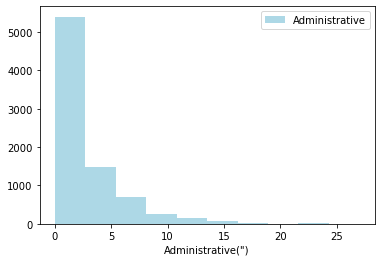

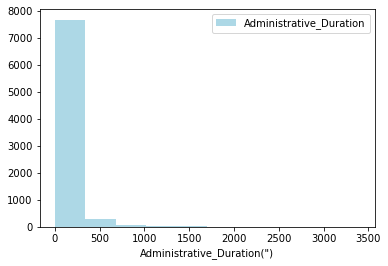

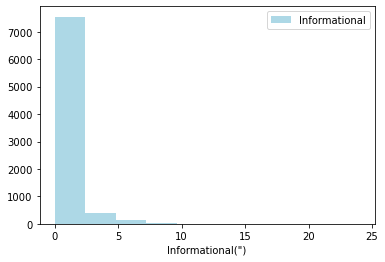

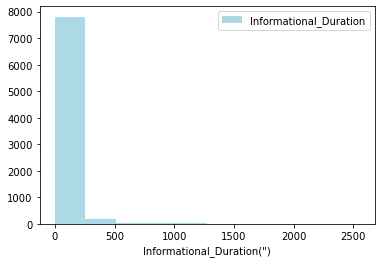

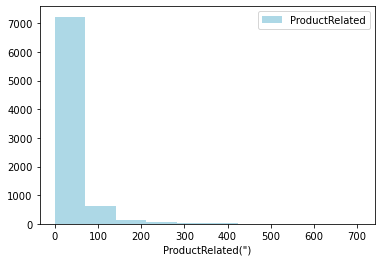

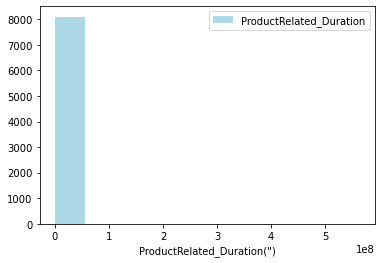

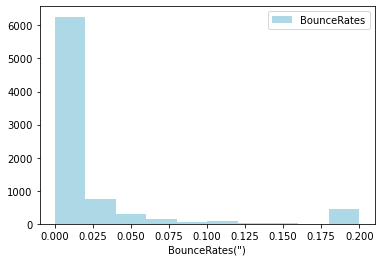

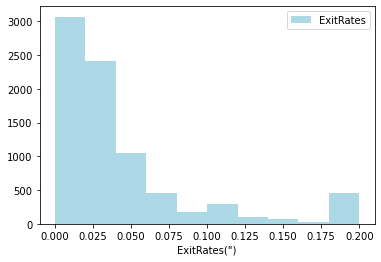

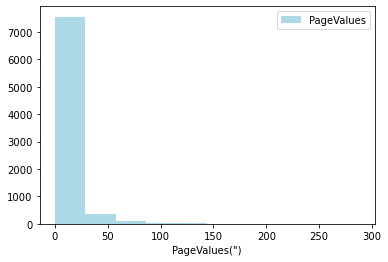

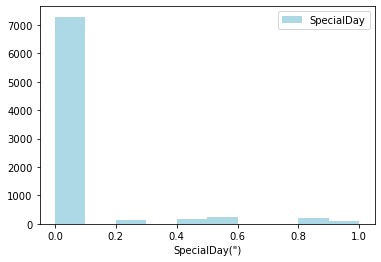

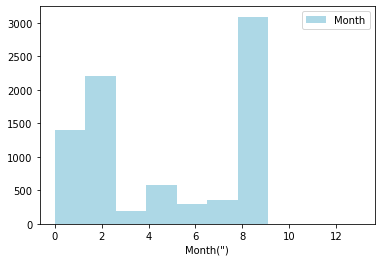

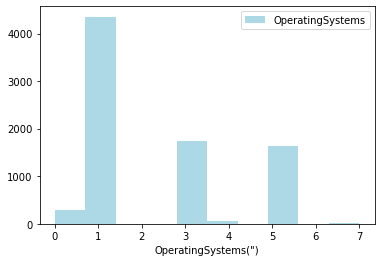

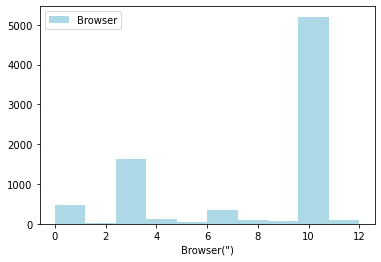

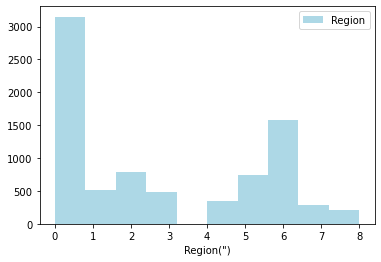

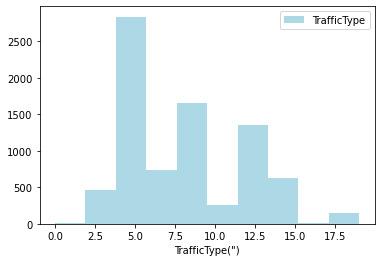

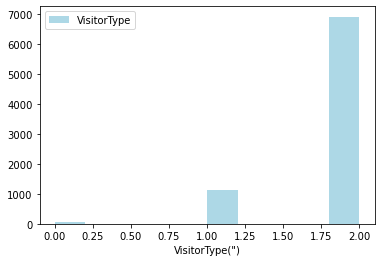

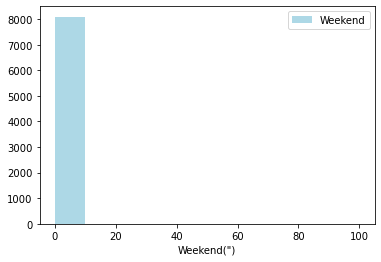

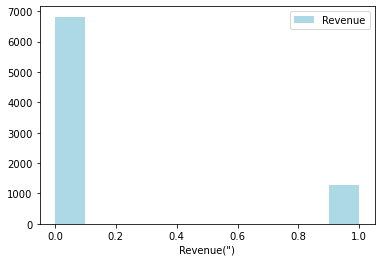

In [8]:
#將各欄位視覺化(直方圖) 
for i in train_new.columns:
    plt.hist(train_new[i], density=False, color = 'lightblue', cumulative = False, label = [i]) #train_new['ID']=train_new.ID
    plt.legend()
    plt.xlabel('{}(")'.format(i))
    plt.show()

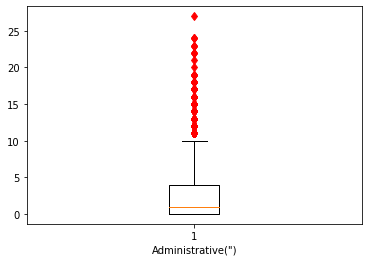

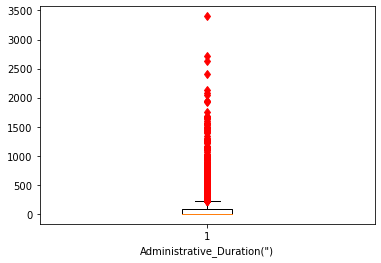

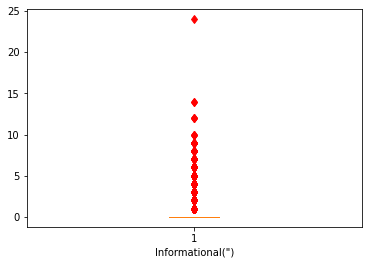

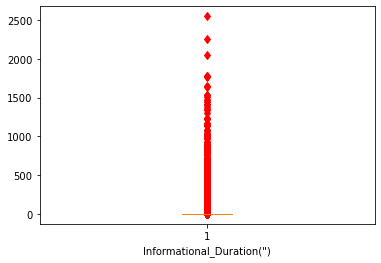

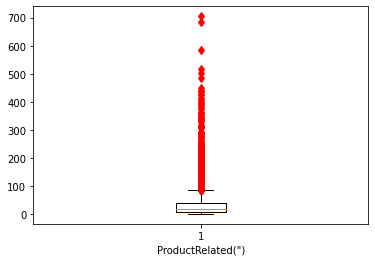

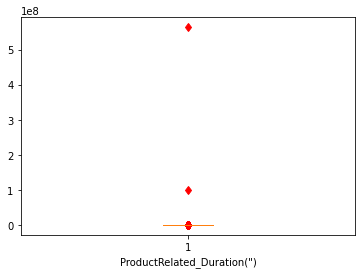

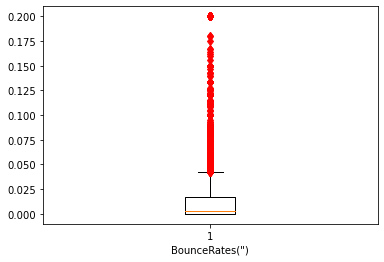

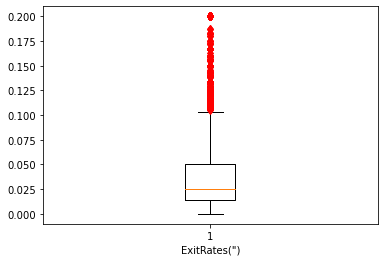

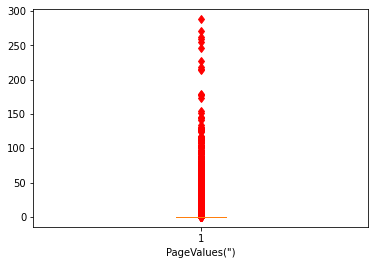

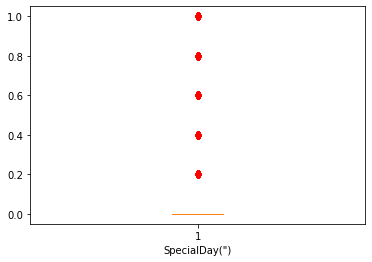

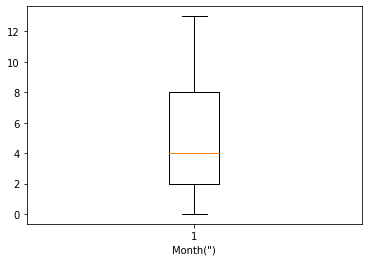

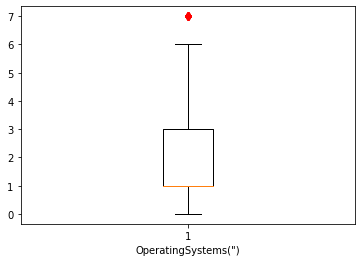

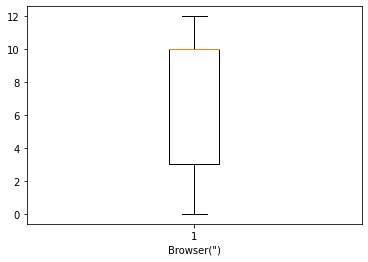

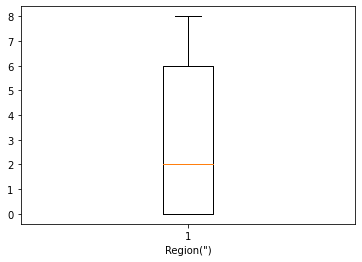

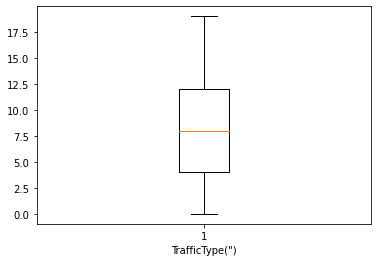

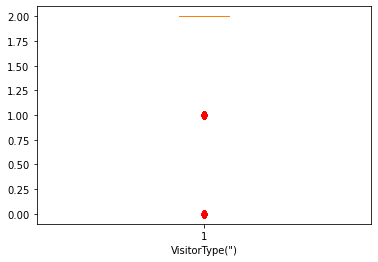

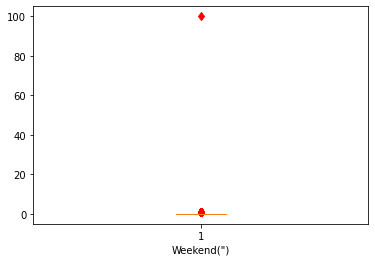

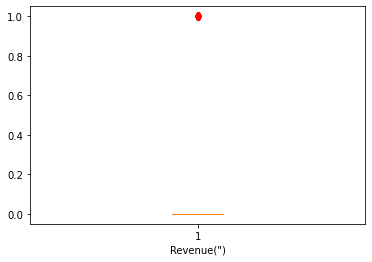

In [9]:
#將各欄位視覺化(盒鬚圖) 
#觀察發現異常值Month有一筆13；Weekend有一筆100
for i in train_new.columns:
    plt.boxplot(train_new[i], sym='rd')
    plt.xlabel('{}(")'.format(i))
    plt.show()

In [10]:
#將異常值替換成NA，再以.dropna刪除該列
train_new[train_new['Month'] == 13] = np.nan
train_new[train_new['Weekend'] == 100] = np.nan
train_new = train_new.dropna()
print(train_new)

      Administrative  Administrative_Duration  Informational  \
0                0.0                 0.000000            0.0   
1                0.0                 0.000000            0.0   
2                9.0               301.000000            0.0   
3                2.0                13.333333            0.0   
4                0.0                 0.000000            0.0   
...              ...                      ...            ...   
8095             0.0                 0.000000            0.0   
8096             1.0                15.200000            2.0   
8097             0.0                 0.000000            0.0   
8098             9.0               183.785714            1.0   
8099             3.0                49.750000            0.0   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                        0.0             1.0                 0.000000   
1                        0.0             1.0                 0.000000   
2           

In [11]:
#將類別特徵欄位數據獨立出來(無法進行標準化)
train_new_cate = train_new.iloc[:, 9:17]
print(train_new_cate)
#刪除列資料後index非連續，影響資料標準化之後的欄位合併，故重新定義index
train_new_cate_sort = train_new_cate.reset_index()
print(train_new_cate_sort)

      SpecialDay  Month  OperatingSystems  Browser  Region  TrafficType  \
0            0.4    2.0               3.0     11.0     3.0          7.0   
1            0.0    9.0               1.0     10.0     0.0          8.0   
2            0.0    8.0               1.0     10.0     0.0         14.0   
3            0.6    2.0               5.0     10.0     0.0          7.0   
4            0.0    2.0               1.0      1.0     0.0          7.0   
...          ...    ...               ...      ...     ...          ...   
8095         0.4    2.0               1.0      1.0     5.0          7.0   
8096         0.0    6.0               3.0     11.0     1.0          8.0   
8097         0.0    6.0               1.0     10.0     0.0          4.0   
8098         0.0    8.0               5.0     10.0     5.0          4.0   
8099         0.0    8.0               5.0     10.0     8.0          4.0   

      VisitorType  Weekend  
0             2.0      0.0  
1             2.0      0.0  
2           

In [12]:
#將無法進行標準化的特徵欄位先拿出來
train_new = train_new.drop(train_new_cate, axis = 1)
print(train_new)

      Administrative  Administrative_Duration  Informational  \
0                0.0                 0.000000            0.0   
1                0.0                 0.000000            0.0   
2                9.0               301.000000            0.0   
3                2.0                13.333333            0.0   
4                0.0                 0.000000            0.0   
...              ...                      ...            ...   
8095             0.0                 0.000000            0.0   
8096             1.0                15.200000            2.0   
8097             0.0                 0.000000            0.0   
8098             9.0               183.785714            1.0   
8099             3.0                49.750000            0.0   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                        0.0             1.0                 0.000000   
1                        0.0             1.0                 0.000000   
2           

In [13]:
#數值型變數做MAXMIN標準
#使用標準化Min-Max套件
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))

#對數據進行標準化
train_new_min_max = min_max_scaler.fit_transform(train_new)

#轉換為Data Frame格式
train_new_min_max = pd.DataFrame(train_new_min_max)
print(train_new_min_max)

             0         1         2         3         4             5  \
0     0.000000  0.000000  0.000000  0.000000  0.001418  0.000000e+00   
1     0.000000  0.000000  0.000000  0.000000  0.001418  0.000000e+00   
2     0.333333  0.088562  0.000000  0.000000  0.053901  4.652452e-06   
3     0.074074  0.003923  0.000000  0.000000  0.148936  3.660109e-06   
4     0.000000  0.000000  0.000000  0.000000  0.026950  3.911053e-07   
...        ...       ...       ...       ...       ...           ...   
8088  0.000000  0.000000  0.000000  0.000000  0.005674  1.437464e-07   
8089  0.037037  0.004472  0.083333  0.024555  0.119149  8.769770e-06   
8090  0.000000  0.000000  0.000000  0.000000  0.035461  1.245595e-06   
8091  0.333333  0.054075  0.041667  0.035303  0.134752  5.938859e-06   
8092  0.111111  0.014638  0.000000  0.000000  0.028369  9.714431e-07   

             6         7         8    9  
0     1.000000  1.000000  0.000000  0.0  
1     1.000000  1.000000  0.000000  0.0  
2     0.1

In [14]:
#接回類別特徵資料
train_scalar = pd.concat([train_new_min_max, train_new_cate_sort], axis = 1)
print(train_scalar)
#刪除index欄位
train_scalar_new = train_scalar.drop('index', axis = 1)
print(train_scalar_new)

             0         1         2         3         4             5  \
0     0.000000  0.000000  0.000000  0.000000  0.001418  0.000000e+00   
1     0.000000  0.000000  0.000000  0.000000  0.001418  0.000000e+00   
2     0.333333  0.088562  0.000000  0.000000  0.053901  4.652452e-06   
3     0.074074  0.003923  0.000000  0.000000  0.148936  3.660109e-06   
4     0.000000  0.000000  0.000000  0.000000  0.026950  3.911053e-07   
...        ...       ...       ...       ...       ...           ...   
8088  0.000000  0.000000  0.000000  0.000000  0.005674  1.437464e-07   
8089  0.037037  0.004472  0.083333  0.024555  0.119149  8.769770e-06   
8090  0.000000  0.000000  0.000000  0.000000  0.035461  1.245595e-06   
8091  0.333333  0.054075  0.041667  0.035303  0.134752  5.938859e-06   
8092  0.111111  0.014638  0.000000  0.000000  0.028369  9.714431e-07   

             6         7         8    9  index  SpecialDay  Month  \
0     1.000000  1.000000  0.000000  0.0      0         0.4    2.0 

In [15]:
#類別變數預處理ONE HOT ENCODING
data_dum = pd.get_dummies(train_scalar_new, columns = train_scalar_new.columns[10:17])
print(data_dum)

             0         1         2         3         4             5  \
0     0.000000  0.000000  0.000000  0.000000  0.001418  0.000000e+00   
1     0.000000  0.000000  0.000000  0.000000  0.001418  0.000000e+00   
2     0.333333  0.088562  0.000000  0.000000  0.053901  4.652452e-06   
3     0.074074  0.003923  0.000000  0.000000  0.148936  3.660109e-06   
4     0.000000  0.000000  0.000000  0.000000  0.026950  3.911053e-07   
...        ...       ...       ...       ...       ...           ...   
8088  0.000000  0.000000  0.000000  0.000000  0.005674  1.437464e-07   
8089  0.037037  0.004472  0.083333  0.024555  0.119149  8.769770e-06   
8090  0.000000  0.000000  0.000000  0.000000  0.035461  1.245595e-06   
8091  0.333333  0.054075  0.041667  0.035303  0.134752  5.938859e-06   
8092  0.111111  0.014638  0.000000  0.000000  0.028369  9.714431e-07   

             6         7         8    9  ...  TrafficType_13.0  \
0     1.000000  1.000000  0.000000  0.0  ...                 0   
1  

In [16]:
#將Revenue[9]移動到最後一欄
move_col = data_dum.pop(data_dum.columns[9])
data_dum.insert(79, move_col.name, move_col)
print(data_dum)

             0         1         2         3         4             5  \
0     0.000000  0.000000  0.000000  0.000000  0.001418  0.000000e+00   
1     0.000000  0.000000  0.000000  0.000000  0.001418  0.000000e+00   
2     0.333333  0.088562  0.000000  0.000000  0.053901  4.652452e-06   
3     0.074074  0.003923  0.000000  0.000000  0.148936  3.660109e-06   
4     0.000000  0.000000  0.000000  0.000000  0.026950  3.911053e-07   
...        ...       ...       ...       ...       ...           ...   
8088  0.000000  0.000000  0.000000  0.000000  0.005674  1.437464e-07   
8089  0.037037  0.004472  0.083333  0.024555  0.119149  8.769770e-06   
8090  0.000000  0.000000  0.000000  0.000000  0.035461  1.245595e-06   
8091  0.333333  0.054075  0.041667  0.035303  0.134752  5.938859e-06   
8092  0.111111  0.014638  0.000000  0.000000  0.028369  9.714431e-07   

             6         7         8  Weekend  ...  TrafficType_14.0  \
0     1.000000  1.000000  0.000000      0.0  ...                 

In [17]:
data_dum.to_csv(r'C:\Users\88691\PycharmProjects\hotel_predit\data-question\555555.csv', index = False)

In [18]:
#PCA
#將trainLabels欄位數據獨立出來
data_dum_new = data_dum.iloc[:, 79:]
print(data_dum_new)

        9
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
...   ...
8088  0.0
8089  0.0
8090  0.0
8091  1.0
8092  1.0

[8093 rows x 1 columns]


In [19]:
#將data_dumg刪去rainLabels欄位
data_dum_new_ta = data_dum.drop(data_dum_new, axis = 1)
print(data_dum_new_ta)

             0         1         2         3         4             5  \
0     0.000000  0.000000  0.000000  0.000000  0.001418  0.000000e+00   
1     0.000000  0.000000  0.000000  0.000000  0.001418  0.000000e+00   
2     0.333333  0.088562  0.000000  0.000000  0.053901  4.652452e-06   
3     0.074074  0.003923  0.000000  0.000000  0.148936  3.660109e-06   
4     0.000000  0.000000  0.000000  0.000000  0.026950  3.911053e-07   
...        ...       ...       ...       ...       ...           ...   
8088  0.000000  0.000000  0.000000  0.000000  0.005674  1.437464e-07   
8089  0.037037  0.004472  0.083333  0.024555  0.119149  8.769770e-06   
8090  0.000000  0.000000  0.000000  0.000000  0.035461  1.245595e-06   
8091  0.333333  0.054075  0.041667  0.035303  0.134752  5.938859e-06   
8092  0.111111  0.014638  0.000000  0.000000  0.028369  9.714431e-07   

             6         7         8  Weekend  ...  TrafficType_13.0  \
0     1.000000  1.000000  0.000000      0.0  ...                 

In [20]:
# 特徵值偏多，樣本數不足時，可利用PCA方法來萃取有效特徵值。
pca = PCA(n_components = 0.85) #萃取保留K%資訊或'mle'MLE算法自己選擇降維維度
pca_train = pca.fit_transform(data_dum_new_ta)
#pca_test = pca.fit_transform(test)

In [21]:
#主成分解釋
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print(pca.explained_variance_) 
print(pca.n_components_)

[0.12658156 0.08476621 0.07375504 0.06741326 0.0638187  0.04914672
 0.04324905 0.04241555 0.03739048 0.0339994  0.03222523 0.02654224
 0.02517565 0.02180857 0.02138575 0.01723761 0.01721288 0.01491298
 0.01449103 0.01372321 0.01191392 0.01117616]
[0.55005417 0.36834753 0.32049903 0.29294111 0.27732112 0.21356472
 0.1879367  0.18431474 0.16247854 0.14774276 0.14003322 0.11533806
 0.10939958 0.09476813 0.09293077 0.07490523 0.07479775 0.06480364
 0.0629701  0.05963355 0.05177137 0.04856549]
22


In [22]:
train = pd.DataFrame(pca_train)
#test = pd.DataFrame(pca.transform(test))
print(train)

            0         1         2         3         4         5         6   \
0     0.791464 -1.207615 -0.493063  0.384353  0.560003 -0.195934 -0.043486   
1    -0.601990 -0.309005 -0.059286 -0.762163 -0.650161  0.590770 -0.255161   
2    -0.625240  0.165967  0.133467 -0.832331 -0.247617 -0.639611  0.391632   
3    -0.232416 -1.085912  0.499071 -0.420004  1.235632 -0.057429 -0.160010   
4    -0.146117 -0.520378 -0.970008 -0.600099  0.432895 -0.093843  0.048176   
...        ...       ...       ...       ...       ...       ...       ...   
8088 -0.235203 -0.833750 -1.164775  0.370029  0.487431 -0.225767  0.056022   
8089  0.784300 -0.376129 -0.064363  0.231982 -0.723694  0.378918 -0.047107   
8090 -0.584181  0.565198 -0.196254 -0.641218  0.165954 -0.147716 -0.596505   
8091 -0.202234  0.483606  1.117002  0.337810  0.095034 -0.682674 -0.266336   
8092 -0.195551  0.494755  1.122261  0.262431  0.123181 -0.683004 -0.266497   

            7         8         9   ...        12        13    

In [23]:
#訓練模型
# 利用萃取特徵值的data，分配train資料集再建模
X_train,X_test,y_train,y_test = train_test_split(train,data_dum_new,test_size=0.30, random_state=101)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5665, 22) (2428, 22) (5665, 1) (2428, 1)


In [24]:
# 利用StratifiedKFold做交叉驗證，相較於KFold，StratifiedKFold會照比例每個data set中抽取資料作驗證
sk_fold = StratifiedKFold(10, shuffle=True, random_state=42)

In [25]:
#模型訓練器
g_nb = GaussianNB()
knn = KNeighborsClassifier()  # 參數:n_neighbors(鄰居數:預設為5)、weights(權重,預設為uniform)、leaf_size(葉的大小:預設為30)
ran_for = RandomForestClassifier()
# n_estimators:樹的顆數、max_depth:最大深度，剪枝用，超過全部剪掉。
# min_samples_leaf:搭配max_depth使用，一個節點在分枝後每個子節點都必須包含至少min_samples_leaf個訓練樣本
# bootstrap:重新取樣原有Data產生新的Data，取樣的過程是均勻且可以重複取樣
log_reg = LogisticRegression()  #penalty:懲罰函數(預設L2)、Ｃ:正則強度倒數，預設為1.0、solver:解決器(默認='lbfgs')，saga對所有懲罰都可以使用
svc = SVC() # kernel:核函數、gamma:“ rbf”，“ poly”和“ Sigmoid”的核係數。,C:正則化的強度與C成反比。必須嚴格為正
tree = DecisionTreeClassifier()
xgb = XGBClassifier()  # https://www.itread01.com/content/1536594984.html 參數詳解
ada_boost = AdaBoostClassifier()  # https://ask.hellobi.com/blog/zhangjunhong0428/12405 參數詳解
grad_boost = GradientBoostingClassifier(n_estimators=100)  # https://www.itread01.com/content/1514358146.html 參數詳解
hist_grad_boost = HistGradientBoostingClassifier()  # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html

In [26]:
#訓練模型之參數設定
clf = [("Naive Bayes", g_nb, {}), \
       ("K Nearest", knn, {"n_neighbors": [3, 5, 6, 7, 8, 9, 10], "leaf_size": [25, 30, 35]}), \
       ("Random Forest", ran_for,
        {"n_estimators": [10, 50, 100, 200, 400], "max_depth": [3, 10, 20, 40], "random_state": [99],
         "min_samples_leaf": [5, 10, 20, 40, 50], "bootstrap": [False]}), \
       ("Logistic Regression", log_reg, {"penalty": ['l2'], "C": [100, 10, 1.0, 0.1, 0.01], "solver": ['saga']}), \
       ("Support Vector", svc,
        {"kernel": ["linear", "rbf"], "gamma": [0.05, 0.0001, 0.01, 0.001], "C": [0.1, 1, 10, 100, 1000]},), \
 \
       ("Decision Tree", tree, {}), \
       ("XGBoost", xgb,
        {"n_estimators": [200], "max_depth": [3, 4, 5], "learning_rate": [.01, .1, .2], "subsample": [.8],
         "colsample_bytree": [1], "gamma": [0, 1, 5], "lambda": [.01, .1, 1]}), \
 \
       ("Adapative Boost", ada_boost, {"n_estimators": [100], "learning_rate": [.6, .8, 1]}), \
       ("Gradient Boost", grad_boost, {}), \
 \
       ("Histogram GB", hist_grad_boost,
        {"loss": ["binary_crossentropy"], "min_samples_leaf": [5, 10, 20, 40, 50], "l2_regularization": [0, .1, 1]})]

In [27]:
#創建stack_list儲存模型Train Score與Test Score
stack_list = []
#創建Evaluation儲存模型儲存Train Score, Test Score(Accuracy), Precision, Sensitivity, Specificity, F1_score
train_scores = pd.DataFrame(columns = ["Name", "Train Score", "Test Score(Accuracy)", "Precision", "Sensitivity", "Specificity", "F1_score"])

In [28]:
# 計算建立模型的時間(起點)
start = time.time()

In [29]:
#利用GridSearchCV自動優化參數
i = 0
for name, clf1, param_grid in clf:
    clf = GridSearchCV(clf1, param_grid=param_grid, scoring="accuracy", cv=sk_fold, return_train_score=True, n_jobs=7) #啟用7核心加速運算
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.best_estimator_.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("=====================================")
    #儲存Train Score, Test Score(Accuracy), Precision, Sensitivity, Specificity, F1_score到train_scores dataframe中
    train_scores.loc[i] = [name, clf.best_score_, (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1]),
                               (cm[0, 0] / (cm[0, 0] + cm[0, 1])), (cm[0, 0] / (cm[0, 0] + cm[1, 1])),
                               (cm[1, 1] / (cm[1, 1] + cm[0, 1])),
                               ((2 * cm[0, 0]) / (2 * cm[0, 0] + cm[1, 0] + cm[0, 1]))]
    stack_list.append(clf.best_estimator_)
    i = i + 1

est = [("g_nb",stack_list[0]),\
       ("knn",stack_list[1]),\
       ("ran_for",stack_list[2]),\
       ("log_reg",stack_list[3]),\
       ("svc",stack_list[4]),\
       ("dec_tree",stack_list[5]),\
       ("XGBoost",stack_list[6]),\
       ("ada_boost",stack_list[7]),\
       ("grad_boost",stack_list[8]),\
       ("hist_grad_boost",stack_list[9])]

[[1844  217]
 [ 279   88]]
[[2030   31]
 [ 351   16]]
[[2044   17]
 [ 362    5]]
[[2051   10]
 [ 355   12]]
[[2061    0]
 [ 367    0]]
[[1736  325]
 [ 279   88]]
[02:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[2022   39]
 [ 342   25]]
[[2040   21]
 [ 358    9]]
[[2022   39]
 [ 356   11]]
[[1974   87]
 [ 330   37]]


In [30]:
#集成學習
sc = StackingClassifier(estimators=est,final_estimator = None,cv=sk_fold,passthrough=False)
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred)
y_pred_train = sc.predict(X_train)
cm2 = confusion_matrix(y_train,y_pred_train)
stacking = pd.Series(["Stacking",(cm2[0,0]+cm2[1,1])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1]), (cm1[0, 0] + cm1[1, 1]) / (cm1[0, 0] + cm1[0, 1] + cm1[1, 0] + cm1[1, 1]),
                           (cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])), (cm1[0, 0] / (cm1[0, 0] + cm1[1, 1])),
                           (cm1[1, 1] / (cm1[1, 1] + cm1[0, 1])), ((2 * cm1[0, 0]) / (2 * cm1[0, 0] + cm1[1, 0] + cm1[0, 1]))],
              index=["Name", "Train Score", "Test Score(Accuracy)", "Precision", "Sensitivity", "Specificity", "F1_score"])
train_scores = train_scores.append(stacking, ignore_index=True)
print(train_scores)

[02:09:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [31]:
# 計算建立模型的時間(終點)
end = time.time()
spend = end - start
hour = spend // 3600
minu = (spend - 3600 * hour) // 60
sec = int(spend - 3600 * hour - 60 * minu)
print(f'一共花費了{hour}小時{minu}分鐘{sec}秒')

一共花費了2.0小時59.0分鐘35秒
